In [1]:
##########################################
# CREDO dataset analysis using deep convolutional autoencoder-based embedding
# Author: Tomasz Hachaj
# e-mail: thachaj@agh.edu.pl
# 2025
##########################################
# Perform eigendecomposition of raw dataset with PCA

import numpy as np
how_many_images = 3500
path_to_data = "data"
T = np.load(path_to_data + "//CREDO_T_st_" + str(how_many_images) + ".npy")
old_shape = np.load(path_to_data + "//CREDO_old_shape_st_" + str(how_many_images) + ".npy")
print('Calculate mean face')
mean_face = T.mean(axis = 1)

for i in range(how_many_images):
    T[:,i] -= mean_face
#how_many_images = v_correct.shape[1]

Calculate mean face


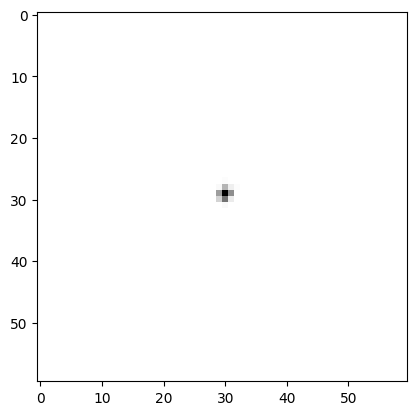

In [2]:
# display example data sample
import matplotlib.pyplot as plt
plt.imshow(np.resize(T[:,0] + mean_face, old_shape) * 255, cmap='Grays')
plt.show()
xx = np.resize(T[:,0] + mean_face, old_shape) * 255

In [3]:
# Prepare training dataset
# We will use the network to analyze the entire data set; we will not need to divide it into training, testing, and validation parts.
import numpy as np
x_train = np.transpose(T)
x_train = x_train[0:how_many_images,:]
x_train.shape

(3500, 3600)

In [4]:
# Create deep autoencoder with bottleneck size is 8 * 8 * 8 = 512
import keras
from keras import layers

from keras.datasets import mnist
import numpy as np
input_img = keras.Input(shape=(x_train.shape[1],))

x = layers.Reshape((60, 60, 1))(input_img)
x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

# at this point the representation is (8, 8, 8) i.e. 256-dimensional

x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(16, (3, 3), activation='relu')(x)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)
decoded = layers.Reshape((60 * 60,))(x)

autoencoder = keras.Model(input_img, decoded)

autoencoder.compile(optimizer='adam', loss='mse')
autoencoder.summary()

autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True)
                #validation_data=(x_test, x_test))


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 3600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape (Reshape)               │ (None, 60, 60, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 60, 60, 16)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 30, 30, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 30, 30, 8)      │         1,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 15, 15, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 15, 15, 8)      │           584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 8, 8, 8)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 8, 8, 8)        │           584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d (UpSampling2D)    │ (None, 16, 16, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 16, 16, 8)      │           584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_1 (UpSampling2D)  │ (None, 32, 32, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 30, 30, 16)     │         1,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_2 (UpSampling2D)  │ (None, 60, 60, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 60, 60, 1)      │           145 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_1 (Reshape)             │ (None, 3600)           │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,385 (17.13 KB)

 Trainable params: 4,385 (17.13 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 85ms/step - loss: 0.2386
Epoch 2/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 84ms/step - loss: 0.1276
Epoch 3/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 86ms/step - loss: 0.0033
Epoch 4/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 85ms/step - loss: 7.3849e-04
Epoch 5/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 89ms/step - loss: 7.2231e-04
Epoch 6/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 80ms/step - loss: 7.2067e-04
Epoch 7/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 82ms/step - loss: 7.2017e-04
Epoch 8/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 79ms/step - loss: 7.1990e-04
Epoch 9/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 99ms/step - loss: 7.1970e-04
Epoch 10/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 80ms/step - loss: 7.1954e-04
Epoch 11/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 84ms/step - loss: 7.1942e-04
Epoch 12/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 84ms/step - loss: 7.1932e-04
Epoch 13/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 82ms/step - loss: 7.1923e-04
Epoch 14/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 84ms/step - loss: 7.1916e-04
Epoch 15/50
14/14 ━━━━━━━━━

110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


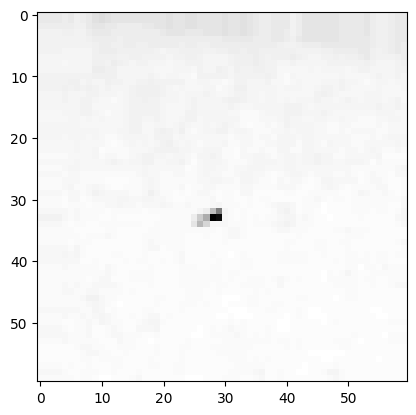

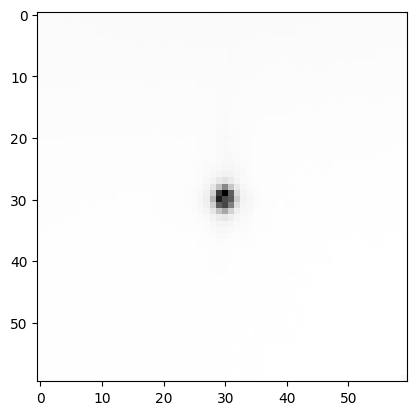

In [6]:
x_reconstructed = autoencoder.predict(x_train)
image_id = 30
# display image and its reconstruction
import matplotlib.pyplot as plt
plt.imshow(np.resize(x_train[image_id,:] + mean_face, old_shape) * 255, cmap='Grays')
plt.show()
plt.imshow(np.resize(x_reconstructed[image_id,:] + mean_face, old_shape) * 255, cmap='Grays')
plt.show()

In [6]:
# create new network from encoder only, which will be used for embedding
flat = keras.layers.Flatten()(encoded)
encoder = keras.Model(input_img, flat)
print(encoder.summary())
# calculate embedding of whole dataset
embedding = encoder.predict(x_train)

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 3600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape (Reshape)               │ (None, 60, 60, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 60, 60, 16)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 30, 30, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 30, 30, 8)      │         1,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 15, 15, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 15, 15, 8)      │           584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 8, 8, 8)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 512)            │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,904 (7.44 KB)

 Trainable params: 1,904 (7.44 KB)

 Non-trainable params: 0 (0.00 B)

None
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


100%|██████████| 3500/3500 [00:00<00:00, 230210.51it/s]


[10, 3428, 744, 1929, 2575, 2639, 2774, 2607, 11, 2578, 847, 1008, 2475, 2867, 1708, 1639, 12, 295, 678, 104, 2951, 2990, 2924, 2076, 13, 191, 2085, 2954, 1482, 1994, 846, 734, 14, 1324, 868, 1958, 2322, 758, 988, 3171, 15, 446, 3495, 1997, 845, 1866, 1826, 433, 16, 2809, 2651, 2115, 934, 546, 1857, 2261, 17, 3154, 72, 3073, 161, 1151, 1378, 195, 18, 939, 170, 365, 1383, 3404, 1607, 157, 19, 1062, 278, 1879, 2517, 3409, 1373, 1538, 20, 1962, 462, 1050, 666, 327, 1670, 2326, 21, 1795, 2031, 1759, 2491, 2260, 668, 2029, 22, 570, 1072, 988, 2212, 1926, 1955, 1921, 23, 2407, 1510, 1346, 2712, 2836, 2472, 3054, 24, 2935, 665, 1472, 2194, 217, 3157, 1614, 25, 3085, 1734, 3201, 1593, 2546, 816, 1034]
[0.0, 0.07173410058021545, 0.07560767233371735, 0.07909144461154938, 0.0872299075126648, 0.09476836025714874, 0.09897562116384506, 0.10218270123004913, 0.0, 0.010817715898156166, 0.012657388113439083, 0.015293765813112259, 0.01611267775297165, 0.016808349639177322, 0.017492683604359627, 0.0180391

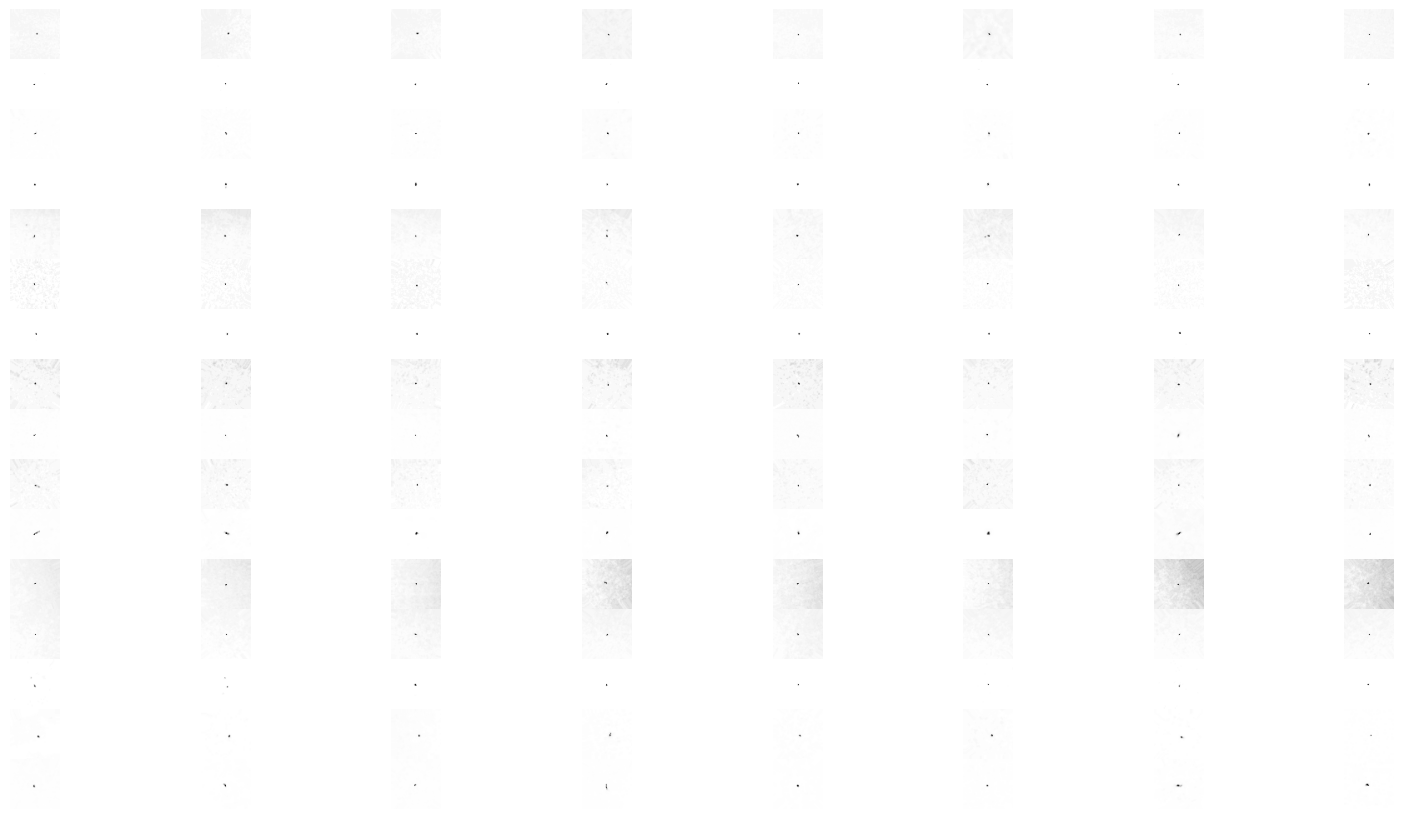

In [7]:
emb_ = embedding
dist = np.zeros(emb_.shape[0])

# set a list of images to which most similar will be found
#my_id_list = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25]
my_id_list = [10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25]
from tqdm import tqdm
def find_most_similar_from_list(x1):
    # "brute force" search
    for i in tqdm(range(emb_.shape[0])):
        dist[i] = np.linalg.norm(x1 - emb_[i,])

    indices = np.argsort(dist)
    dist_sort = dist[indices]
    return (indices, dist_sort)

my_ids = []
my_dist = []
for my_id in my_id_list:
    (indices, dist_sort) = find_most_similar_from_list(emb_[my_id,])
    _my_ids = indices[0:8]
    _my_dist = dist_sort[0:8]
    my_ids.extend(_my_ids.tolist())
    my_dist.extend(_my_dist.tolist())

import matplotlib.pyplot as plt
columns = 8
fig = plt.figure(figsize=(len(my_id_list), columns))


xx = 0
yy = 0
# display results
for aaa in range(len(my_ids)):
    img_help = T[:,my_ids[aaa]] + mean_face
    img_help = img_help.reshape(old_shape)
    aaa1 = aaa + 1
    fig.add_subplot(len(my_id_list), columns, aaa1)
    plt.axis('off')
    plt.tight_layout(pad=0.00)
    plt.imshow(img_help, cmap='Grays')

print(my_ids)
print(my_dist)
plt.show()

100%|██████████| 3500/3500 [00:00<00:00, 6234.01it/s]


[25, 36, 43, 60, 78, 114, 116, 136, 197, 247, 274, 280, 284, 364, 384, 402, 404, 445, 547, 650, 662, 689, 710, 713, 725, 748, 752, 770, 814, 869, 895, 906, 935, 946, 958, 998, 1034, 1122, 1188, 1215, 1257, 1259, 1261, 1270, 1322, 1347, 1353, 1372, 1395, 1398, 1439, 1495, 1655, 1728, 1747, 1801, 1841, 1884, 1885, 1892, 1904, 1906, 1943, 1969, 1995, 2006, 2035, 2037, 2105, 2156, 2159, 2181, 2190, 2243, 2340, 2389, 2443, 2457, 2488, 2594, 2629, 2665, 2671, 2677, 2698, 2731, 2751, 2758, 2766, 2786, 2794, 2808, 2821, 2878, 2891, 2903, 2939, 2968, 3020, 3068, 3087, 3090, 3132, 3193, 3201, 3227, 3240, 3326, 3358, 3370, 3385, 3386, 3391, 3408, 3438, 3441, 3445, 3473]
[25, 36, 43, 60, 78, 114, 116, 136, 197, 247, 274, 280, 284, 364, 384, 402, 404, 445, 547, 650, 662, 689, 710, 713, 725, 748, 752, 770, 814, 869, 895, 906, 935, 946, 958, 998, 1034, 1122, 1188, 1215, 1257, 1259, 1261, 1270, 1322, 1347, 1353, 1372, 1395, 1398, 1439, 1495, 1655, 1728, 1747, 1801, 1841, 1884, 1885, 1892, 1904, 1906, 

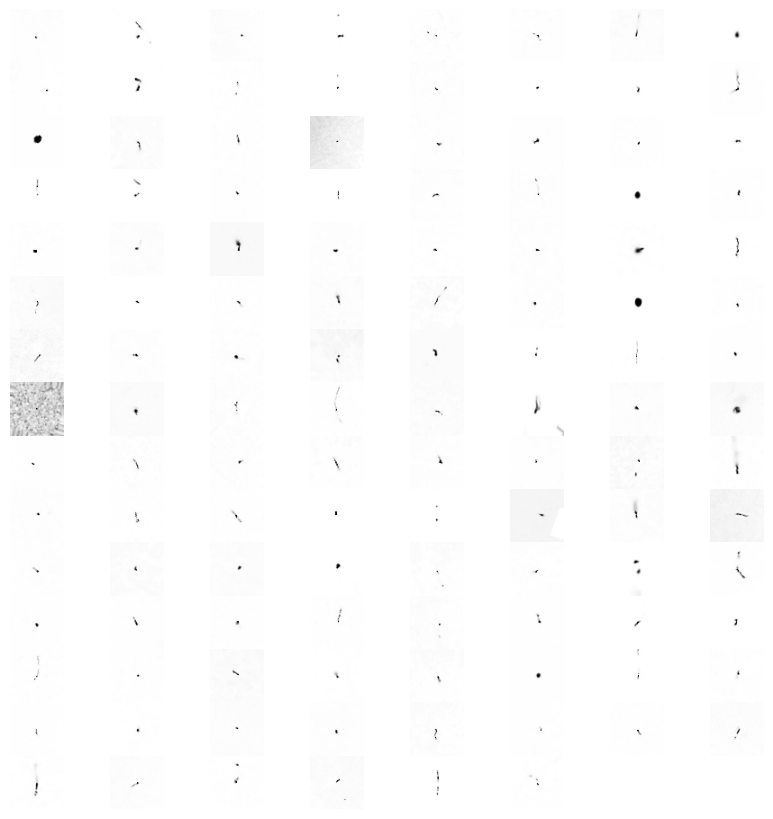

In [11]:
# density-based anomalies detection, parameters have the same role as in DBSCAN
eps=0.5
min_samples=3

# find objects which do not have at least min_samples objects in eps neighbourhood
# "fast" implementation using numba
import numba as nb
@nb.jit(nopython=True)
def func_nb(emb_array_copy, i, eps, min_samples):
    min_samples_help = 0
    x1 = emb_array_copy[i,]
    for j in range(emb_array_copy.shape[0]):
        if i != j:
            x2 = emb_array_copy[j,]
            dist = np.linalg.norm(x1 - x2)
            if dist < eps:
                min_samples_help = min_samples_help + 1
            if min_samples_help > min_samples:
                return False
    return True

my_ids = []
from tqdm import tqdm
for i in tqdm(range(emb_.shape[0])):
    if func_nb(emb_, i, eps, min_samples):
        my_ids.append(i)

# plot results
print(my_ids)
import matplotlib.pyplot as plt
import cv2
columns = 8
fig = plt.figure(figsize=(columns, columns))
rows = int(len(my_ids) / columns) + 1

columns2 = columns + 1
rows2 = int(len(my_ids) / columns2) + 1
ret_img = np.zeros((128 * rows2, 128 * columns2, 3))

xx = 0
yy = 0
for aaa in range(len(my_ids)):
    img_help = T[:,my_ids[aaa]] + mean_face
    img_help = img_help.reshape(old_shape)

    aaa1 = aaa + 1
    fig.add_subplot(rows, columns, aaa1)

    plt.axis('off')
    plt.tight_layout(pad=0.00)

    plt.imshow(img_help, cmap='Grays')


print(my_ids)
plt.show()